COEFICIENTES DEL MODELO:
[ 6.73420644e-02 -1.36136445e+00 -1.27726916e-01  4.18558963e-02
 -5.52276598e-01  6.03047217e-03 -2.53902788e-03 -5.13364051e+01
  4.14323192e-01  7.75674922e-01  2.65432262e-01]
METRICAS:
MAE: 0.5672959513328623
MSE: 0.5337103954450699
RMSE: 0.7305548545079075
R2: 0.32556695476652175


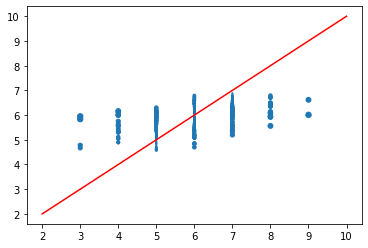

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Repetir todos los pasos
data = pd.read_csv('../Data/winequality.csv',sep=';')

# print(data.keys())


# print('-----------')
# print('Correlacion')
# print('-----------')

# data.corr()

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

# Train model

X1 = data[['free sulfur dioxide']]
# X1 = data.drop("quality",axis=1)
y1 = data['quality']

# scaler = MinMaxScaler(feature_range=(4, 9))
# scaler.fit(y1)
# y1 = scaler.transform(y1)

#print(y1[1,:])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1)

#Se añade el parametro dual=False para evitar el error: warnings.warn( liblinear failed to converge increase
# clf = LinearSVC(random_state=0,dual=False).fit(x_train, y_train)
clf = LinearRegression().fit(x_train, y_train)



## LogisticRegression
# clf = LogisticRegression()
# clf.fit(X1, y1)

y_pred = clf.predict(x_test)

from sklearn.metrics import recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error 
#Coeficientes del modelo
print('COEFICIENTES DEL MODELO:')
print(clf.coef_)

# Error de la recta de regresion
clf.intercept_

#Metricas


print('METRICAS:')
print(f"MAE La media del error: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE Error tipico de prediccion: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Indice para ver si un modelo es mejor que otro: {clf.score(x_test, y_test)}") #Esta entre 0 y 1.

# clf.best_params_

plt.scatter(y_test, y_pred,
            s=10*np.sqrt(np.power(y_pred - y_test, 2)))
plt.plot([2, 10], [2, 10], c='red')